In [1]:
# This script is to build knn, understand how to select n, and also calculate silouette score

In [44]:
# Libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
# Loading dataset
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns =iris.feature_names)

In [9]:
# Simulate a categorical feature to showcase how to handle categorical values
np.random.seed(42)
df_iris['Category'] = np.random.choice(['A','B','C'], size = len(df_iris))

In [10]:
# Encode categorical feature as knn is distance based algorithm
df_iris_encoded = pd.get_dummies(df_iris, columns = ['Category'])

In [14]:
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category
0,5.1,3.5,1.4,0.2,C
1,4.9,3.0,1.4,0.2,A
2,4.7,3.2,1.3,0.2,C
3,4.6,3.1,1.5,0.2,C
4,5.0,3.6,1.4,0.2,A


In [13]:
df_iris_encoded.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category_A,Category_B,Category_C
0,5.1,3.5,1.4,0.2,False,False,True
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,False,False,True
3,4.6,3.1,1.5,0.2,False,False,True
4,5.0,3.6,1.4,0.2,True,False,False


In [41]:
# Buildling kmeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_iris_encoded)

KMeans(n_clusters=3, random_state=42)

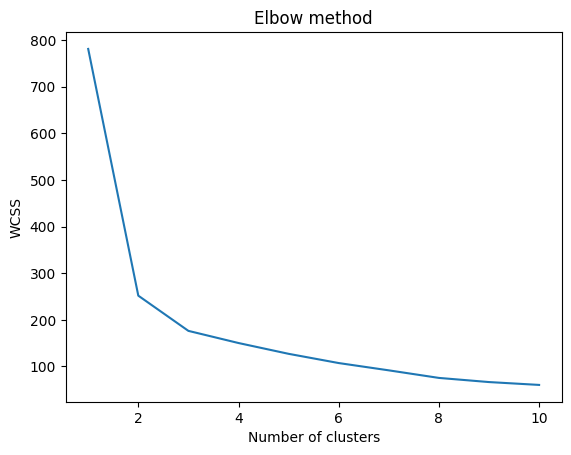

In [42]:
# Elbow plot
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42, n_init=10)
    kmeans.fit(df_iris_encoded)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
# Looking at the elbow plot, n=4 seems to be the best number to select 

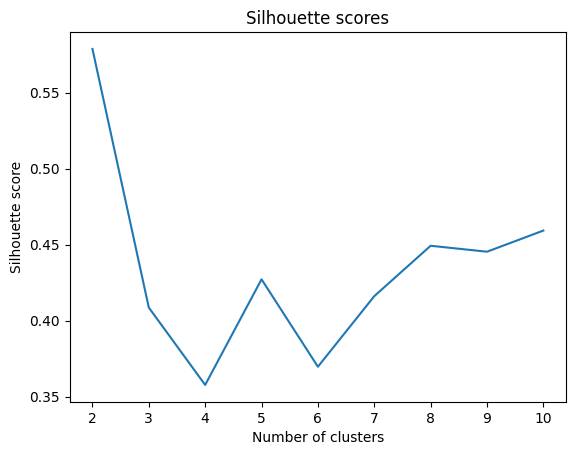

In [43]:
# Using Silhouette score to measure cluster quality
silhouette_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_iris_encoded)
    score = silhouette_score(df_iris_encoded,kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2,11),silhouette_scores)
plt.title('Silhouette scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [37]:
# Basically if we want to automate identification of cluster, we could use this approach to find best cluster size